<a href="https://colab.research.google.com/github/Frankoceans11/GSB-521/blob/main/GSB_521_project_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Do certain accolades,achievements,or player position determine whether a NBA player will be in the Hall of Fame? 

February 28th,2023


Alan Mondragon alan.mondra95@gmail.com Joseph Lee jlee932cp@gmail.com

Hypothesis: We beleive that certain accolades/achievements or position determine whether a NBA player will be in the Hall of Fame (HOF).

In [4]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
df = pd.read_csv('/content/NBA Hall of Famers.csv')

In [6]:
df.head()

,Name,position,All_star_selections,In_Hall_of_fame,height,weight,born
0,Kareem Abdul-Jabbar,C,19,1,218,102,1947
1,Kobe Bryant,G,18,1,198,96,1978
2,LeBron James,F,17,2,203,113,1984
3,Tim Duncan,F,15,1,211,113,1976
4,Kevin Garnett,F,15,1,211,108,1976


Looking at the data types.

In [7]:
df.dtypes

Name                   object
position               object
All_star_selections     int64
In_Hall_of_fame         int64
height                  int64
weight                  int64
born                    int64
dtype: object

In [8]:
bins = np.linspace(1919, 2009, 10)
bins

array([1919., 1929., 1939., 1949., 1959., 1969., 1979., 1989., 1999.,
       2009.])

In [9]:
group_names = ["1920s", "1930s", "1940s", "1950s",
                "1960s", "1970s", "1980s", "1990s", "2000s"]
group_names

['1920s',
 '1930s',
 '1940s',
 '1950s',
 '1960s',
 '1970s',
 '1980s',
 '1990s',
 '2000s']

In [10]:
df['Decade'] = pd.cut(df['born'], bins, labels=group_names, include_lowest=True)
df.head(5)

,Name,position,All_star_selections,In_Hall_of_fame,height,weight,born,Decade
0,Kareem Abdul-Jabbar,C,19,1,218,102,1947,1940s
1,Kobe Bryant,G,18,1,198,96,1978,1970s
2,LeBron James,F,17,2,203,113,1984,1980s
3,Tim Duncan,F,15,1,211,113,1976,1970s
4,Kevin Garnett,F,15,1,211,108,1976,1970s


In [11]:
dummy_variable_1 = pd.get_dummies(df["position"])
dummy_variable_1.rename(columns={'C': 'Center', 'F': 'Forward', 'G': 'Guard'}, inplace=True)
dummy_variable_1.head(5)

,Center,Forward,Guard
0,1,0,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,1,0


In [12]:
df = pd.concat([df, dummy_variable_1], axis=1)

In [13]:
dummy_variable_2 = pd.get_dummies(df["In_Hall_of_fame"])
dummy_variable_2.rename(columns={1: 'In the Hall of fame', 2: 'Active player', 0: 'Not in the HOF/ retired'}, inplace=True)
dummy_variable_2.head()

,Not in the HOF/ retired,In the Hall of fame,Active player
0,0,1,0
1,0,1,0
2,0,0,1
3,0,1,0
4,0,1,0


In [14]:
df = pd.concat([df, dummy_variable_2], axis=1)

In [15]:
df.head(5)

,Name,position,All_star_selections,In_Hall_of_fame,height,weight,born,Decade,Center,Forward,Guard,Not in the HOF/ retired,In the Hall of fame,Active player
0,Kareem Abdul-Jabbar,C,19,1,218,102,1947,1940s,1,0,0,0,1,0
1,Kobe Bryant,G,18,1,198,96,1978,1970s,0,0,1,0,1,0
2,LeBron James,F,17,2,203,113,1984,1980s,0,1,0,0,0,1
3,Tim Duncan,F,15,1,211,113,1976,1970s,0,1,0,0,1,0
4,Kevin Garnett,F,15,1,211,108,1976,1970s,0,1,0,0,1,0


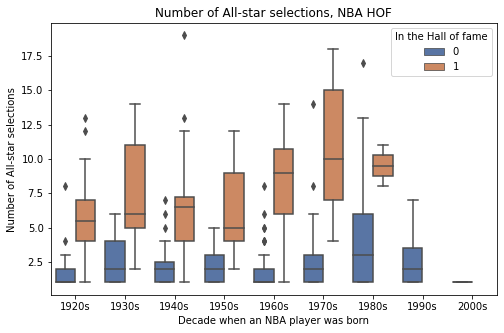

In [16]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Decade', y='All_star_selections',
    data=df, hue='In the Hall of fame', palette='deep')
plt.xlabel("Decade when an NBA player was born")
plt.ylabel("Number of All-star selections")
plt.title("Number of All-star selections, NBA HOF")
plt.show()
plt.close()

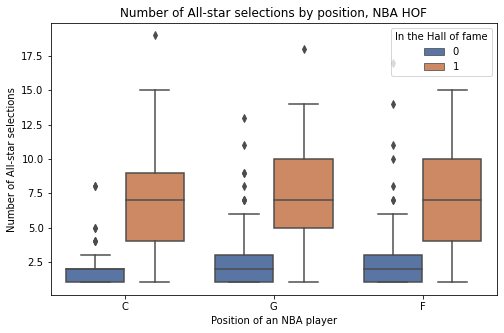

In [17]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='position', y='All_star_selections',
    data=df, hue='In the Hall of fame', palette='deep')
plt.xlabel("Position of an NBA player")
plt.ylabel("Number of All-star selections")
plt.title("Number of All-star selections by position, NBA HOF")
plt.show()
plt.close()

<AxesSubplot:>

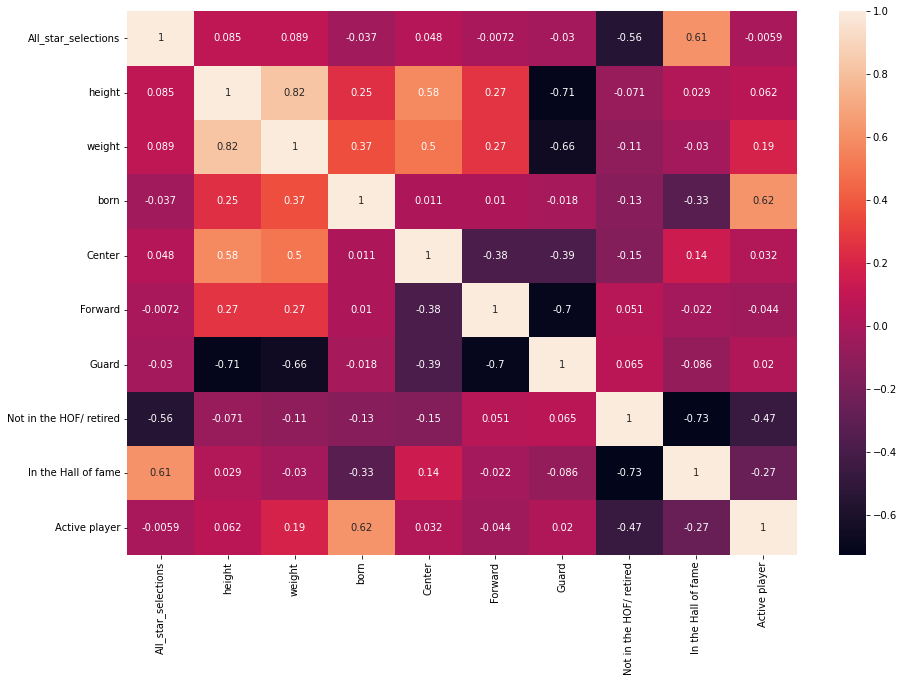

In [20]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df[[ 'All_star_selections', 'height', 'weight','born','Center','Forward',
                'Guard', 'Not in the HOF/ retired','In the Hall of fame','Active player'
                ]].corr(),annot=True)



Later in our analysis we will look at other attributes such as: points, eFG%, Minutes played, and other stats to see if these also play a factor in determining if a player will make the HOF.


Look at the outliers of those players that made the hall of fame and those who did not. based on all star selection.